<a href="https://colab.research.google.com/github/NeerajSirvisetti/Transfer-Learning/blob/master/emergency_vs_non_emergency_vehicle_detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
from google.colab import drive
drive.mount('/content/gdrive')

In [0]:
# importing the libraries
import pandas as pd
import numpy as np
from tqdm import tqdm

# for reading and displaying images
from skimage.io import imread
from skimage.transform import resize
import matplotlib.pyplot as plt
%matplotlib inline

# for creating validation set
from sklearn.model_selection import train_test_split

# for evaluating the model
from sklearn.metrics import accuracy_score

In [0]:
from keras.applications import vgg16
from keras.models import Model
import keras

In [0]:
# loading dataset

train = pd.read_csv('/content/gdrive/My Drive/emergency_vs_non-emergency_dataset/emergency_train.csv')
train.head()

In [0]:
# defining the target
train_y = train['emergency_or_not'].values

In [0]:
# loading training images
train_img = []
for img_name in tqdm(train['image_names']):
    # defining the image path
    image_path = '/content/gdrive/My Drive/emergency_vs_non-emergency_dataset/images/' + img_name
    # reading the image
    img = imread(image_path)
    # normalizing the pixel values
    img = img/255
    # resizing the image to (224,224,3)
    img = resize(img, output_shape=(224,224,3), mode='constant', anti_aliasing=True)
    # converting the type of pixel to float 32
    img = img.astype('float32')
    # appending the image into the list
    train_img.append(img)

# converting the list to numpy array
train_x = np.array(train_img)
train_x.shape

In [0]:
# Exploring the data
index = 12
plt.imshow(train_x[index])
if (train['emergency_or_not'][index] == 1):
    print('It is an Emergency vehicle')
else:
    print('It is a Non-Emergency vehicle')

In [0]:
# create validation set
train_x, val_x, train_y, val_y = train_test_split(train_x, train_y, test_size = 0.1, random_state = 13, stratify=train_y)
(train_x.shape, train_y.shape), (val_x.shape, val_y.shape)

In [0]:
batch_size = 128
num_classes = 2
epochs = 30
input_shape = (224, 224, 3)

In [0]:
#Model 1 - Basic CNN
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from keras.models import Sequential
from keras import optimizers

model1 = Sequential()

model1.add(Conv2D(16, kernel_size=(3, 3), activation='relu', 
                 input_shape=input_shape))
model1.add(MaxPooling2D(pool_size=(2, 2)))

model1.add(Conv2D(64, kernel_size=(3, 3), activation='relu'))
model1.add(MaxPooling2D(pool_size=(2, 2)))

model1.add(Conv2D(128, kernel_size=(3, 3), activation='relu'))
model1.add(MaxPooling2D(pool_size=(2, 2)))

model1.add(Flatten())
model1.add(Dense(512, activation='relu'))
model1.add(Dense(1, activation='sigmoid'))


model1.compile(loss='binary_crossentropy',
              optimizer=optimizers.RMSprop(),
              metrics=['accuracy'])

model1.summary()

In [0]:
!pip install pydot

In [0]:
from IPython.display import SVG
from keras.utils.vis_utils import model_to_dot

SVG(model_to_dot(model1, show_shapes=True, 
                 show_layer_names=True, rankdir='TB').create(prog='dot', format='svg'))

In [0]:
history = model1.fit(x=train_x, y=train_y,
                    validation_data=(val_x, val_y),
                    batch_size=30,
                    epochs=epochs,
                    verbose=1)

In [0]:
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 4))
t = f.suptitle('Basic CNN Performance', fontsize=12)
f.subplots_adjust(top=0.85, wspace=0.3)

epoch_list = list(range(1,31))
ax1.plot(epoch_list, history.history['acc'], label='Train Accuracy')
ax1.plot(epoch_list, history.history['val_acc'], label='Validation Accuracy')
ax1.set_xticks(np.arange(0, 31, 5))
ax1.set_ylabel('Accuracy Value')
ax1.set_xlabel('Epoch')
ax1.set_title('Accuracy')
l1 = ax1.legend(loc="best")

ax2.plot(epoch_list, history.history['loss'], label='Train Loss')
ax2.plot(epoch_list, history.history['val_loss'], label='Validation Loss')
ax2.set_xticks(np.arange(0, 31, 5))
ax2.set_ylabel('Loss Value')
ax2.set_xlabel('Epoch')
ax2.set_title('Loss')
l2 = ax2.legend(loc="best")

In [0]:
#Model2
model2 = Sequential()

model2.add(Conv2D(16, kernel_size=(3, 3), activation='relu', 
                 input_shape=input_shape))
model2.add(MaxPooling2D(pool_size=(2, 2)))

model2.add(Conv2D(64, kernel_size=(3, 3), activation='relu'))
model2.add(MaxPooling2D(pool_size=(2, 2)))

model2.add(Conv2D(128, kernel_size=(3, 3), activation='relu'))
model2.add(MaxPooling2D(pool_size=(2, 2)))

model2.add(Conv2D(128, kernel_size=(3, 3), activation='relu'))
model2.add(MaxPooling2D(pool_size=(2, 2)))

model2.add(Flatten())
model2.add(Dense(512, activation='relu'))
model2.add(Dropout(0.3))
model2.add(Dense(512, activation='relu'))
model2.add(Dropout(0.3))
model2.add(Dense(1, activation='sigmoid'))


model2.compile(loss='binary_crossentropy',
              optimizer=optimizers.RMSprop(),
              metrics=['accuracy'])

model2.summary()

In [0]:
history2 = model2.fit(x=train_x, y=train_y,
                    validation_data=(val_x, val_y),
                    batch_size=batch_size,
                    epochs=epochs,
                    verbose=1)

In [0]:
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 4))
t = f.suptitle('Basic CNN 2 Performance', fontsize=12)
f.subplots_adjust(top=0.85, wspace=0.3)

epoch_list = list(range(1,31))
ax1.plot(epoch_list, history2.history['acc'], label='Train Accuracy')
ax1.plot(epoch_list, history2.history['val_acc'], label='Validation Accuracy')
ax1.set_xticks(np.arange(0, 31, 5))
ax1.set_ylabel('Accuracy Value')
ax1.set_xlabel('Epoch')
ax1.set_title('Accuracy')
l1 = ax1.legend(loc="best")

ax2.plot(epoch_list, history2.history['loss'], label='Train Loss')
ax2.plot(epoch_list, history2.history['val_loss'], label='Validation Loss')
ax2.set_xticks(np.arange(0, 31, 5))
ax2.set_ylabel('Loss Value')
ax2.set_xlabel('Epoch')
ax2.set_title('Loss')
l2 = ax2.legend(loc="best")

# Model of CNN with augmentation

In [0]:
from keras.preprocessing.image import ImageDataGenerator
train_datagen = ImageDataGenerator(rescale=1./255, zoom_range=0.3, rotation_range=50,
                                   width_shift_range=0.2, height_shift_range=0.2, shear_range=0.2, 
                                   horizontal_flip=True, fill_mode='nearest')

val_datagen = ImageDataGenerator(rescale=1./255)

In [0]:
train_generator = train_datagen.flow(train_x, train_y, batch_size=30)
val_generator = val_datagen.flow(val_x, val_y, batch_size=20)

In [0]:
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from keras.models import Sequential
from keras import optimizers

model3 = Sequential()

model3.add(Conv2D(16, kernel_size=(3, 3), activation='relu', 
                 input_shape=input_shape))
model3.add(MaxPooling2D(pool_size=(2, 2)))

model3.add(Conv2D(64, kernel_size=(3, 3), activation='relu'))
model3.add(MaxPooling2D(pool_size=(2, 2)))

model3.add(Conv2D(128, kernel_size=(3, 3), activation='relu'))
model3.add(MaxPooling2D(pool_size=(2, 2)))

model3.add(Conv2D(128, kernel_size=(3, 3), activation='relu'))
model3.add(MaxPooling2D(pool_size=(2, 2)))

model3.add(Flatten())
model3.add(Dense(512, activation='relu'))
model3.add(Dropout(0.3))
model3.add(Dense(512, activation='relu'))
model3.add(Dropout(0.3))
model3.add(Dense(1, activation='sigmoid'))


model3.compile(loss='binary_crossentropy',
              optimizer=optimizers.RMSprop(lr=1e-4),
              metrics=['accuracy'])

model3.summary()

In [0]:
history3 = model3.fit_generator(train_generator, steps_per_epoch=100, epochs=100,
                              validation_data=val_generator, validation_steps=50, verbose=1)

In [0]:
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 4))
t = f.suptitle('CNN with Image Augmentation Performance', fontsize=12)
f.subplots_adjust(top=0.85, wspace=0.3)

epoch_list = list(range(1,101))
ax1.plot(epoch_list, history3.history['acc'], label='Train Accuracy')
ax1.plot(epoch_list, history3.history['val_acc'], label='Validation Accuracy')
ax1.set_xticks(np.arange(0, 101, 10))
ax1.set_ylabel('Accuracy Value')
ax1.set_xlabel('Epoch')
ax1.set_title('Accuracy')
l1 = ax1.legend(loc="best")

ax2.plot(epoch_list, history3.history['loss'], label='Train Loss')
ax2.plot(epoch_list, history3.history['val_loss'], label='Validation Loss')
ax2.set_xticks(np.arange(0, 101, 10))
ax2.set_ylabel('Loss Value')
ax2.set_xlabel('Epoch')
ax2.set_title('Loss')
l2 = ax2.legend(loc="best")

In [0]:
model3.save('emergency_non_cnn_img_aug.h5')

In [27]:
from keras.applications import vgg16
from keras.models import Model
import keras

vgg = vgg16.VGG16(include_top=False, weights='imagenet', 
                                     input_shape=input_shape)

output = vgg.layers[-1].output
output = keras.layers.Flatten()(output)

vgg_model = Model(vgg.input, output)
vgg_model.trainable = False

for layer in vgg_model.layers:
    layer.trainable = False

vgg_model.summary()

58892288/58889256 [==============================] - 6s 0us/step
Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 224, 224, 3)       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
____________________________________________________________

In [28]:
pd.set_option('max_colwidth', -1)

layers = [(layer, layer.name, layer.trainable) for layer in vgg_model.layers]
pd.DataFrame(layers, columns=['Layer Type', 'Layer Name', 'Layer Trainable'])

,Layer Type,Layer Name,Layer Trainable
0,<keras.engine.input_layer.InputLayer object at 0x7fb6f18c7ba8>,input_1,False
1,<keras.layers.convolutional.Conv2D object at 0x7fb6f1872898>,block1_conv1,False
2,<keras.layers.convolutional.Conv2D object at 0x7fb6f1872b70>,block1_conv2,False
3,<keras.layers.pooling.MaxPooling2D object at 0x7fb6f1794b70>,block1_pool,False
4,<keras.layers.convolutional.Conv2D object at 0x7fb6f17a5438>,block2_conv1,False
5,<keras.layers.convolutional.Conv2D object at 0x7fb6f17cabe0>,block2_conv2,False
6,<keras.layers.pooling.MaxPooling2D object at 0x7fb6f17d0a58>,block2_pool,False
7,<keras.layers.convolutional.Conv2D object at 0x7fb6f175a978>,block3_conv1,False
8,<keras.layers.convolutional.Conv2D object at 0x7fb6f175b1d0>,block3_conv2,False
9,<keras.layers.convolutional.Conv2D object at 0x7fb6f17675c0>,block3_conv3,False


In [0]:
def get_bottleneck_features(models, input_imgs):
    
    features = models.predict(input_imgs, verbose=0)
    return features

In [30]:
train_features_vgg = get_bottleneck_features(vgg_model, train_x)
validation_features_vgg = get_bottleneck_features(vgg_model, val_x)

print('Train Bottleneck Features:', train_features_vgg.shape, 
      '\tValidation Bottleneck Features:', validation_features_vgg.shape)

Train Bottleneck Features: (1481, 25088) 	Validation Bottleneck Features: (165, 25088)


In [31]:
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, InputLayer
from keras.models import Sequential
from keras import optimizers

input_shape = vgg_model.output_shape[1]

model4 = Sequential()
model4.add(InputLayer(input_shape=(input_shape,)))
model4.add(Dense(512, activation='relu', input_dim=input_shape))
model4.add(Dropout(0.3))
model4.add(Dense(512, activation='relu'))
model4.add(Dropout(0.3))
model4.add(Dense(1, activation='sigmoid'))

model4.compile(loss='binary_crossentropy',
              optimizer=optimizers.RMSprop(lr=1e-4),
              metrics=['accuracy'])

model4.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_9 (Dense)              (None, 512)               12845568  
_________________________________________________________________
dropout_5 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_10 (Dense)             (None, 512)               262656    
_________________________________________________________________
dropout_6 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_11 (Dense)             (None, 1)                 513       
Total params: 13,108,737
Trainable params: 13,108,737
Non-trainable params: 0
_________________________________________________________________


In [35]:
history4 = model4.fit(x=train_features_vgg, y=train_y,
                    validation_data=(validation_features_vgg, val_y),
                    batch_size=batch_size,
                    epochs=epochs,
                    verbose=1)

Train on 1481 samples, validate on 165 samples
Epoch 1/30
1481/1481 [==============================] - 1s 528us/step - loss: 0.8225 - acc: 0.6502 - val_loss: 0.5262 - val_acc: 0.7394
Epoch 2/30
1481/1481 [==============================] - 0s 176us/step - loss: 0.4411 - acc: 0.7995 - val_loss: 0.4856 - val_acc: 0.7758
Epoch 3/30
1481/1481 [==============================] - 0s 187us/step - loss: 0.4034 - acc: 0.8082 - val_loss: 0.3210 - val_acc: 0.8364
Epoch 4/30
1481/1481 [==============================] - 0s 186us/step - loss: 0.3540 - acc: 0.8386 - val_loss: 0.2725 - val_acc: 0.8788
Epoch 5/30
1481/1481 [==============================] - 0s 181us/step - loss: 0.2414 - acc: 0.9061 - val_loss: 0.3603 - val_acc: 0.8424
Epoch 6/30
1481/1481 [==============================] - 0s 184us/step - loss: 0.2702 - acc: 0.8751 - val_loss: 0.2409 - val_acc: 0.9030
Epoch 7/30
1481/1481 [==============================] - 0s 173us/step - loss: 0.2232 - acc: 0.9055 - val_loss: 0.2219 - val_acc: 0.9212
E

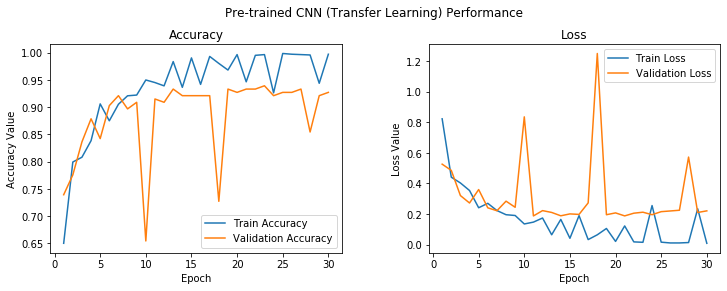

In [36]:
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 4))
t = f.suptitle('Pre-trained CNN (Transfer Learning) Performance', fontsize=12)
f.subplots_adjust(top=0.85, wspace=0.3)

epoch_list = list(range(1,31))
ax1.plot(epoch_list, history4.history['acc'], label='Train Accuracy')
ax1.plot(epoch_list, history4.history['val_acc'], label='Validation Accuracy')
ax1.set_xticks(np.arange(0, 31, 5))
ax1.set_ylabel('Accuracy Value')
ax1.set_xlabel('Epoch')
ax1.set_title('Accuracy')
l1 = ax1.legend(loc="best")

ax2.plot(epoch_list, history4.history['loss'], label='Train Loss')
ax2.plot(epoch_list, history4.history['val_loss'], label='Validation Loss')
ax2.set_xticks(np.arange(0, 31, 5))
ax2.set_ylabel('Loss Value')
ax2.set_xlabel('Epoch')
ax2.set_title('Loss')
l2 = ax2.legend(loc="best")

In [0]:
model4.save('emergency_non_tlearn_basic_cnn.h5')

In [0]:
#model 5
train_datagen = ImageDataGenerator(rescale=1./255, zoom_range=0.3, rotation_range=50,
                                   width_shift_range=0.2, height_shift_range=0.2, shear_range=0.2, 
                                   horizontal_flip=True, fill_mode='nearest')

val_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow(train_x, train_y, batch_size=30)
val_generator = val_datagen.flow(val_x, val_y, batch_size=20)

In [39]:
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, InputLayer
from keras.models import Sequential
from keras import optimizers

model5 = Sequential()
model5.add(vgg_model)
model5.add(Dense(512, activation='relu', input_dim=input_shape))
model5.add(Dropout(0.3))
model5.add(Dense(512, activation='relu'))
model5.add(Dropout(0.3))
model5.add(Dense(1, activation='sigmoid'))

model5.compile(loss='binary_crossentropy',
              optimizer=optimizers.RMSprop(lr=2e-5),
              metrics=['accuracy'])

model5.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
model_1 (Model)              (None, 25088)             14714688  
_________________________________________________________________
dense_12 (Dense)             (None, 512)               12845568  
_________________________________________________________________
dropout_7 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_13 (Dense)             (None, 512)               262656    
_________________________________________________________________
dropout_8 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_14 (Dense)             (None, 1)                 513       
Total params: 27,823,425
Trainable params: 13,108,737
Non-trainable params: 14,714,688
_________________________________

In [40]:
history5 = model5.fit_generator(train_generator, steps_per_epoch=100, epochs=100,
                              validation_data=val_generator, validation_steps=50, verbose=1)

Epoch 1/100
100/100 [==============================] - 40s 400ms/step - loss: 0.7027 - acc: 0.5445 - val_loss: 0.6927 - val_acc: 0.5903
Epoch 2/100
100/100 [==============================] - 33s 332ms/step - loss: 0.6990 - acc: 0.5626 - val_loss: 0.6797 - val_acc: 0.5835
Epoch 3/100
100/100 [==============================] - 34s 337ms/step - loss: 0.6888 - acc: 0.5688 - val_loss: 0.6816 - val_acc: 0.5849
Epoch 4/100
100/100 [==============================] - 35s 347ms/step - loss: 0.6867 - acc: 0.5788 - val_loss: 0.6772 - val_acc: 0.5890
Epoch 5/100
100/100 [==============================] - 34s 342ms/step - loss: 0.6889 - acc: 0.5721 - val_loss: 0.6771 - val_acc: 0.5924
Epoch 6/100
100/100 [==============================] - 34s 343ms/step - loss: 0.6822 - acc: 0.5835 - val_loss: 0.6789 - val_acc: 0.5846
Epoch 7/100
100/100 [==============================] - 35s 351ms/step - loss: 0.6802 - acc: 0.5792 - val_loss: 0.6771 - val_acc: 0.5892
Epoch 8/100
100/100 [===========================

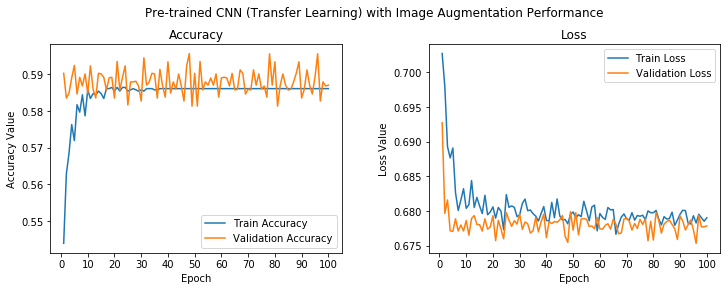

In [41]:
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 4))
t = f.suptitle('Pre-trained CNN (Transfer Learning) with Image Augmentation Performance', fontsize=12)
f.subplots_adjust(top=0.85, wspace=0.3)

epoch_list = list(range(1,101))
ax1.plot(epoch_list, history5.history['acc'], label='Train Accuracy')
ax1.plot(epoch_list, history5.history['val_acc'], label='Validation Accuracy')
ax1.set_xticks(np.arange(0, 101, 10))
ax1.set_ylabel('Accuracy Value')
ax1.set_xlabel('Epoch')
ax1.set_title('Accuracy')
l1 = ax1.legend(loc="best")

ax2.plot(epoch_list, history5.history['loss'], label='Train Loss')
ax2.plot(epoch_list, history5.history['val_loss'], label='Validation Loss')
ax2.set_xticks(np.arange(0, 101, 10))
ax2.set_ylabel('Loss Value')
ax2.set_xlabel('Epoch')
ax2.set_title('Loss')
l2 = ax2.legend(loc="best")

In [42]:
vgg_model.trainable = True

set_trainable = False
for layer in vgg_model.layers:
    if layer.name in ['block5_conv1', 'block4_conv1']:
        set_trainable = True
    if set_trainable:
        layer.trainable = True
    else:
        layer.trainable = False
        
print("Trainable layers:", vgg_model.trainable_weights)

Trainable layers: [<tf.Variable 'block4_conv1/kernel:0' shape=(3, 3, 256, 512) dtype=float32_ref>, <tf.Variable 'block4_conv1/bias:0' shape=(512,) dtype=float32_ref>, <tf.Variable 'block4_conv2/kernel:0' shape=(3, 3, 512, 512) dtype=float32_ref>, <tf.Variable 'block4_conv2/bias:0' shape=(512,) dtype=float32_ref>, <tf.Variable 'block4_conv3/kernel:0' shape=(3, 3, 512, 512) dtype=float32_ref>, <tf.Variable 'block4_conv3/bias:0' shape=(512,) dtype=float32_ref>, <tf.Variable 'block5_conv1/kernel:0' shape=(3, 3, 512, 512) dtype=float32_ref>, <tf.Variable 'block5_conv1/bias:0' shape=(512,) dtype=float32_ref>, <tf.Variable 'block5_conv2/kernel:0' shape=(3, 3, 512, 512) dtype=float32_ref>, <tf.Variable 'block5_conv2/bias:0' shape=(512,) dtype=float32_ref>, <tf.Variable 'block5_conv3/kernel:0' shape=(3, 3, 512, 512) dtype=float32_ref>, <tf.Variable 'block5_conv3/bias:0' shape=(512,) dtype=float32_ref>]


In [43]:

layers = [(layer, layer.name, layer.trainable) for layer in vgg_model.layers]
pd.DataFrame(layers, columns=['Layer Type', 'Layer Name', 'Layer Trainable'])

,Layer Type,Layer Name,Layer Trainable
0,<keras.engine.input_layer.InputLayer object at 0x7fb6f18c7ba8>,input_1,False
1,<keras.layers.convolutional.Conv2D object at 0x7fb6f1872898>,block1_conv1,False
2,<keras.layers.convolutional.Conv2D object at 0x7fb6f1872b70>,block1_conv2,False
3,<keras.layers.pooling.MaxPooling2D object at 0x7fb6f1794b70>,block1_pool,False
4,<keras.layers.convolutional.Conv2D object at 0x7fb6f17a5438>,block2_conv1,False
5,<keras.layers.convolutional.Conv2D object at 0x7fb6f17cabe0>,block2_conv2,False
6,<keras.layers.pooling.MaxPooling2D object at 0x7fb6f17d0a58>,block2_pool,False
7,<keras.layers.convolutional.Conv2D object at 0x7fb6f175a978>,block3_conv1,False
8,<keras.layers.convolutional.Conv2D object at 0x7fb6f175b1d0>,block3_conv2,False
9,<keras.layers.convolutional.Conv2D object at 0x7fb6f17675c0>,block3_conv3,False


In [0]:
train_datagen = ImageDataGenerator(rescale=1./255, zoom_range=0.3, rotation_range=50,
                                   width_shift_range=0.2, height_shift_range=0.2, shear_range=0.2, 
                                   horizontal_flip=True, fill_mode='nearest')

val_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow(train_x, train_y, batch_size=30)
val_generator = val_datagen.flow(val_x, val_y, batch_size=20)

In [45]:
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, InputLayer
from keras.models import Sequential
from keras import optimizers

model6 = Sequential()
model6.add(vgg_model)
model6.add(Dense(512, activation='relu', input_dim=input_shape))
model6.add(Dropout(0.3))
model6.add(Dense(512, activation='relu'))
model6.add(Dropout(0.3))
model6.add(Dense(1, activation='sigmoid'))

model6.compile(loss='binary_crossentropy',
              optimizer=optimizers.RMSprop(lr=1e-5),
              metrics=['accuracy'])

model6.summary()

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
model_1 (Model)              (None, 25088)             14714688  
_________________________________________________________________
dense_15 (Dense)             (None, 512)               12845568  
_________________________________________________________________
dropout_9 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_16 (Dense)             (None, 512)               262656    
_________________________________________________________________
dropout_10 (Dropout)         (None, 512)               0         
_________________________________________________________________
dense_17 (Dense)             (None, 1)                 513       
Total params: 27,823,425
Trainable params: 26,087,937
Non-trainable params: 1,735,488
__________________________________

In [0]:
history6 = model6.fit_generator(train_generator, steps_per_epoch=100, epochs=100,
                              validation_data=val_generator, validation_steps=50, verbose=1)

Epoch 1/100
100/100 [==============================] - 40s 404ms/step - loss: 0.7003 - acc: 0.5535 - val_loss: 0.6794 - val_acc: 0.5870
Epoch 2/100
100/100 [==============================] - 37s 372ms/step - loss: 0.6958 - acc: 0.5714 - val_loss: 0.6770 - val_acc: 0.5912
Epoch 3/100
100/100 [==============================] - 37s 371ms/step - loss: 0.6900 - acc: 0.5696 - val_loss: 0.6919 - val_acc: 0.5795
Epoch 4/100
100/100 [==============================] - 37s 373ms/step - loss: 0.6880 - acc: 0.5684 - val_loss: 0.6733 - val_acc: 0.6000
Epoch 5/100
100/100 [==============================] - 37s 367ms/step - loss: 0.6847 - acc: 0.5734 - val_loss: 0.6802 - val_acc: 0.5805
Epoch 6/100
100/100 [==============================] - 37s 373ms/step - loss: 0.6832 - acc: 0.5765 - val_loss: 0.6787 - val_acc: 0.5890
Epoch 7/100
100/100 [==============================] - 37s 371ms/step - loss: 0.6832 - acc: 0.5690 - val_loss: 0.6776 - val_acc: 0.5881
Epoch 8/100
100/100 [===========================

In [0]:
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 4))
t = f.suptitle('Pre-trained CNN (Transfer Learning) with Fine-Tuning & Image Augmentation Performance', fontsize=12)
f.subplots_adjust(top=0.85, wspace=0.3)

epoch_list = list(range(1,101))
ax1.plot(epoch_list, history6.history['acc'], label='Train Accuracy')
ax1.plot(epoch_list, history6.history['val_acc'], label='Validation Accuracy')
ax1.set_xticks(np.arange(0, 101, 10))
ax1.set_ylabel('Accuracy Value')
ax1.set_xlabel('Epoch')
ax1.set_title('Accuracy')
l1 = ax1.legend(loc="best")

ax2.plot(epoch_list, history6.history['loss'], label='Train Loss')
ax2.plot(epoch_list, history6.history['val_loss'], label='Validation Loss')
ax2.set_xticks(np.arange(0, 101, 10))
ax2.set_ylabel('Loss Value')
ax2.set_xlabel('Epoch')
ax2.set_title('Loss')
l2 = ax2.legend(loc="best")

In [0]:
model6.save('emergency_non_tlearn_finetune_img_aug_cnn.h5')